In [18]:
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import scipy.optimize as opt
import numpy as np

%run ../ICMEmodelClass.py


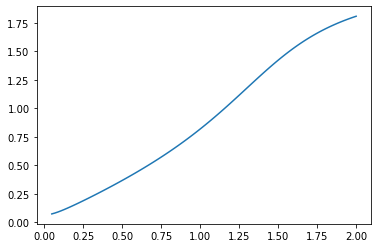

In [17]:
icme = ICMEmodel(0.3, 1, np.sqrt(5.5), 1)
lam = np.linspace(0.05, 2, 100)

tmp = []

for l in lam:
    k = 2*np.pi*2.35/l
    beta = icme.sol_mode_eq(l, mode='TM')
    if beta != None:
        kz = np.sqrt(k*k - beta*beta)
        tmp.append(kz/beta)
    else:
        tmp.append(0)

plt.plot(lam, tmp)

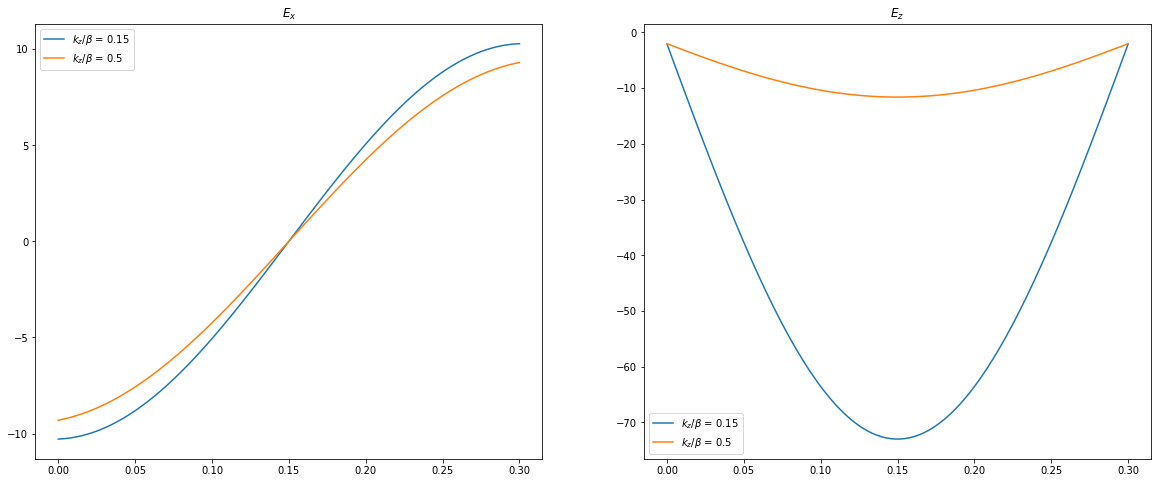

In [18]:
lam1 = 0.2
lam2 = 1
beta1 = icme.sol_mode_eq(lam1, mode='TM')
beta2 = icme.sol_mode_eq(lam2, mode='TM')
Z = np.linspace(0, 0.3, 100)
E1 = icme.get_E_field_TM(beta1, lam1, Z)
E2 = icme.get_E_field_TM(beta2, lam2, Z)
fig, ax = plt.subplots(1, 2, figsize=(20, 8))

ax[0].plot(Z, np.imag(E1[0]), label=r'$k_z$/$\beta$ = 0.15')
ax[0].plot(Z, np.imag(E2[0]), label=r'$k_z$/$\beta$ = 0.5')
ax[0].set_title(f"$E_x$")
ax[0].legend()
ax[1].plot(Z, E1[2], label=r'$k_z$/$\beta$ = 0.15')
ax[1].plot(Z, E2[2], label=r'$k_z$/$\beta$ = 0.5')
ax[1].set_title(f"$E_z$")
ax[1].legend()

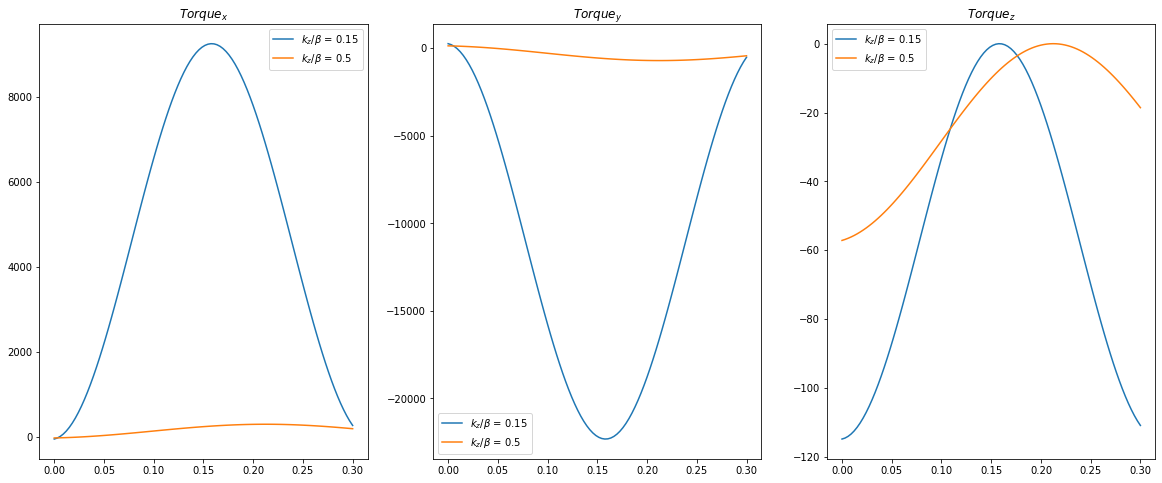

In [9]:
lam1 = 0.2
lam2 = 1
beta1 = icme.sol_mode_eq(lam1, mode='TM')
beta2 = icme.sol_mode_eq(lam2, mode='TM')
Z = np.linspace(0, 0.3, 100)
E1 = icme.get_E_field_TM(beta1, lam1, Z)
E2 = icme.get_E_field_TM(beta2, lam2, Z)
# E1 = icme.normalize_E(icme.get_E_field_TM(beta1, lam1, Z))
# E2 = icme.normalize_E(icme.get_E_field_TM(beta2, lam2, Z))
#

phi = np.pi/4
H = icme.get_H(1, np.pi/8, np.pi/8)
M = icme.get_M_from_H(H, phi)
t1 = icme.get_icme_torque(E1, H, M, phi)
t2 = icme.get_icme_torque(E2, H, M, phi)

fig, ax = plt.subplots(1, 3, figsize=(20, 8))
axes = ['x', 'y', 'z']
for i in range(3):
    ax[i].plot(Z, t1[:, i], label=r'$k_z$/$\beta$ = 0.15')
    ax[i].plot(Z, t2[:, i], label=r'$k_z$/$\beta$ = 0.5')
    ax[i].set_title(f"$Torque_{axes[i]}$")
    ax[i].legend()


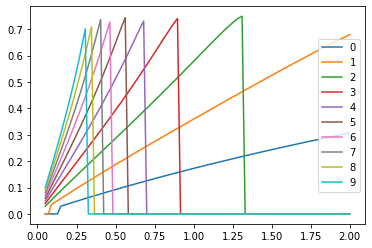

In [19]:
icme = ICMEmodel(1, 1, 2.5, 2)

lam = np.linspace(0.05, 2, 100)

for N in range(10):
    tmp = []

    for l in lam:
        k = 2*np.pi*2.5/l
        beta = icme.sol_mode_eq(l, mode='TE', N=N)
        if beta != None:
            kz = np.sqrt(k*k - beta*beta)
            tmp.append(kz/beta)
        else:
            tmp.append(0)

    plt.plot(lam, tmp, label=N)

plt.legend()

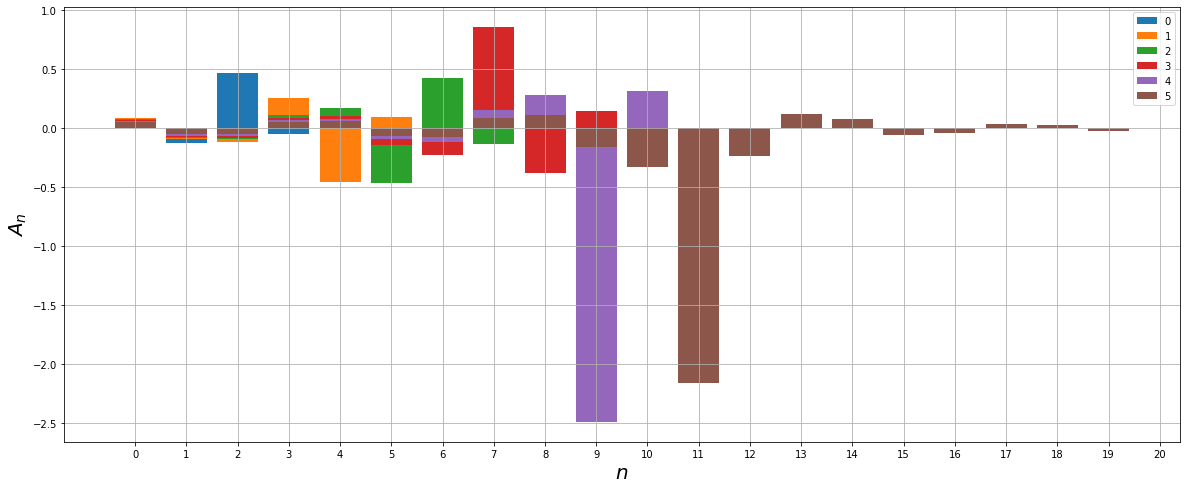

In [40]:
lam = 0.5
betas = [icme.sol_mode_eq(lam, mode='TE', N=i) for i in range(6)]
ns = [i for i in range(20)]
plt.figure(figsize=(20, 8))

for i, b in enumerate(betas):
    tmp = [icme.A_n(n, lam,  b, i) for n in ns]
    plt.bar(ns, tmp, label=i)

plt.ylabel('$A_n$', size=20)
plt.xlabel('$n$', size=20)
plt.xticks([i for i in range(0, 21)], [i for i in range(0, 21)])
plt.grid()
plt.legend()
